<a href="https://colab.research.google.com/github/joykangangi/DataSciencePlayground/blob/main/k_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='#31394d'>k-Means Clustering Practice Exercise</font>

In this notebook, we are going to apply clustering algorithm to identify homogenous groups of customers from the `mall_customer.csv` dataset.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### <font color='#31394d'>Import and Explore the Data</font>

In [ ]:
df = pd.read_csv(r'C:\Users\lenovo\PycharmProjects\Kamilimu DS\intro-to-ml-2\homework\data\mall_customers.csv')


🚀 <font color='#D9C4B1'>Exercise: </font> Explore your data. How large is it? Are there any missing values? What are the data types?

# EDA

In [ ]:
df.shape

(200, 5)

In [ ]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [ ]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


#### There are 5 columns
- CustomerID -  numerical
- Gender - female or male; categorical
- Age - numerical
- Annual Income (k$) -numerical
- Spending Score - numerical

#### Gender is categorical but wont be transformed to numerical. This is because the converted values wont represent the actual differences between 0 and 1's. Hence the'll be innacuracy in the model.

In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### 1.Visualization

<AxesSubplot:>

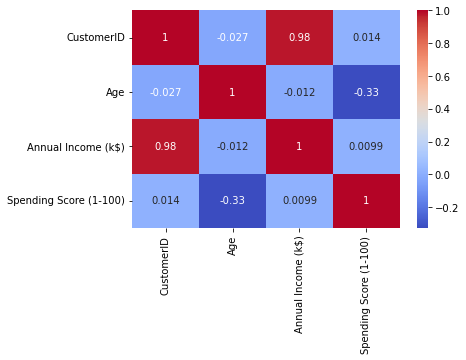

In [ ]:
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)

### Strong Relations:
- CustomerID and Annual Income
- SpendingScore and Age

#### Gender Analysis

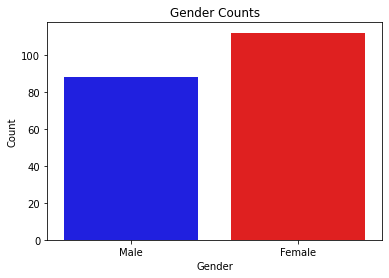

Men Count:88, 44.0%
Female Count:112, 56.0%


In [ ]:
total_female = df[df['Gender']=='Female']['Age'].count()
total_male = df[df['Gender']=='Male']['Age'].count()
total_people = total_male + total_female

sns.countplot(data=df,x='Gender',palette=['blue','red'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Counts')
plt.show()


print("Men Count:{}, {}%".format(total_male, np.round((total_male / total_people )*100),2))
print("Female Count:{}, {}%".format(total_female,np.round((total_female / total_people)*100),2))

#### Females are 56% of the customers. Hence, females visit the mall more than males.

### Util Functions

In [ ]:
def draw_hist(feature:str, bins_range:range,yticks:range, ylim:any, x_cord:int,y_cord:int):

    males = df[df['Gender']=='Male'][feature]
    females = df[df['Gender']=='Female'][feature]
    # create a range from min to max feature count e.g age count and increment by the last param. 
    # each bin in the hist will represent the ranges e.g 15-20 
    bins = bins_range
    # Create a figure with two subplots side by side
    # y-axis is same for both subplots
    fig,(AX1,AX2) = plt.subplots(1,2, figsize=(15,5), sharey=True)

    #Male hostogram /left subplot ax1
    sns.histplot(males,bins=bins, kde=True,color='blue', ax=AX1,edgecolor='black',linewidth=2)
    AX1.set_xticks(bins)
    AX1.set_yticks(yticks)
    AX1.set_ylim(ylim)
    AX1.set_title('Males')
    AX1.set_ylabel('Count')
    AX1.text(x_cord,y_cord, "Mean {}: {:.1f}k$".format(feature,males.mean()))
    AX1.text(x_cord,y_cord-1, "Median {}: {:.1f}k$".format(feature,males.median()))
    AX1.text(x_cord,y_cord-2, "Std Deviation: {:.1f}k$". format(males.std()))

    #Females Hist
    sns.histplot(females, bins=bins, kde=True,color='red',ax=AX2, edgecolor = 'black',linewidth=2)
    AX2.set_xticks(bins)
    AX2.set_title('Female')
    AX2.text(x_cord,y_cord, "Mean {}: {:.1f}k$".format(feature,females.mean()))
    AX2.text(x_cord,y_cord-1, "Median {}: {:.1f}k$".format(feature,females.median()))
    AX2.text(x_cord,y_cord-2, "Std Deviation: {:.1f}k$".format(females.std()))

    # Add a main title to the figure
    plt.suptitle('Distribution of Customer {} by Gender'.format(feature), fontsize=16)

    plt.show()

In [ ]:
#Boxplot
def draw_box(feature:str):
    males = df[df['Gender']=='Male'][feature]
    females = df[df['Gender']=='Female'][feature]
    if(males.median() < males.mean()):
        print("Most males have {} above the median {}".format(feature, feature))
    else:
        print("Most males have {} below the median {}".format(feature, feature))

    if(females.median() < females.mean()):
        print("Most females have {} above the median {}".format(feature, feature))
    else:
        print("Most females have {} below the median {}".format(feature, feature))    

    sns.boxplot(df,x='Gender',y=feature)
    plt.title('BoxPlot of {}'.format(feature))
    plt.show()

In [ ]:
def draw_bars(feature: str):
    medians_by_age_group =df.groupby(['Gender', pd.cut(df['Age'],range(15,75,5) )]).median()
    medians_by_age_group.index = medians_by_age_group.index.set_names(['Gender', 'Age_group'])
    medians_by_age_group.reset_index(inplace=True)

    fig2, ax = plt.subplots(figsize=(12,5))
    sns.barplot(x='Age_group',y= feature,hue='Gender',data=medians_by_age_group, palette=['red', 'blue'], edgecolor='black', ax=ax)
    ax.set_title('Median {} of male and female customers'.format(feature))
    ax.set_label('Age Group')
    plt.show()

### Age Analysis

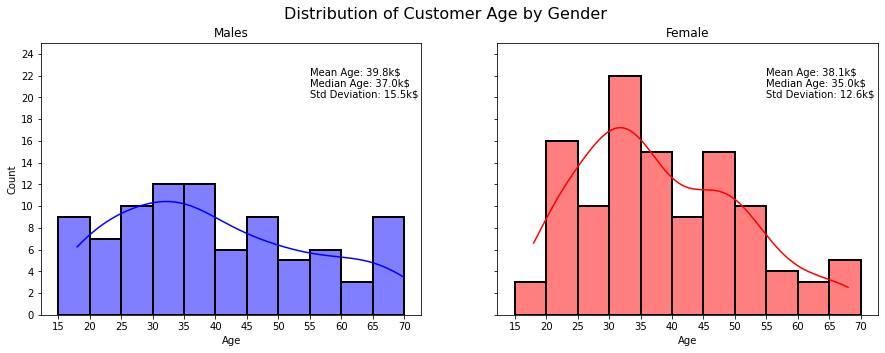

In [ ]:

draw_hist(feature='Age', bins_range=range(15,75,5),yticks=range(0,25,2),ylim=(0,25),x_cord=55,y_cord=22)

#### Notes
- The mean age of men shoppers,39 is slightly older than for women,38.
- Distribution for male ages is more uniform than female.
- The biggest male age group is 30-40 yrs while for women it's 30-35 yrs.

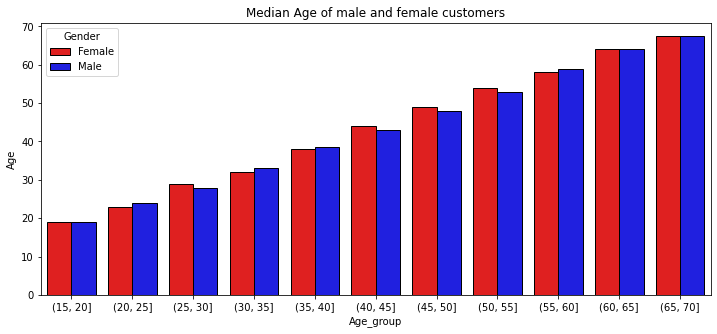

In [ ]:
draw_bars('Age')

#### Notes
- Females from ages 25-50 mall frequently than men but after that the male start going to the mall more.
- This is true except for age 35-40 where men are more than women

Most males have Age above the median Age
Most females have Age above the median Age


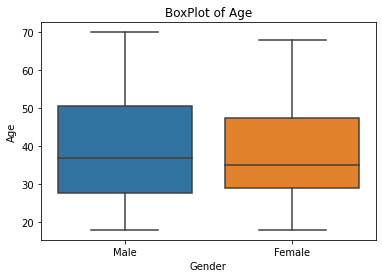

In [ ]:
draw_box('Age')

### Annual Income Analysis

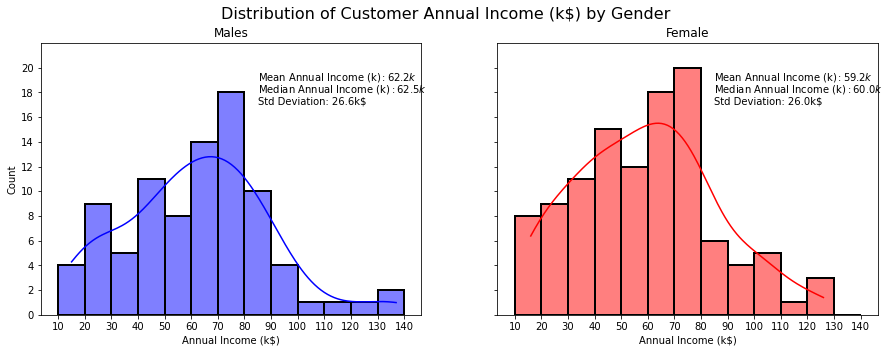

In [ ]:
draw_hist(feature='Annual Income (k$)', bins_range=range(10,150,10),yticks=range(0,22,2),ylim=(0,22),x_cord=85,y_cord=19)

Most males have Annual Income (k$) below the median Annual Income (k$)
Most females have Annual Income (k$) below the median Annual Income (k$)


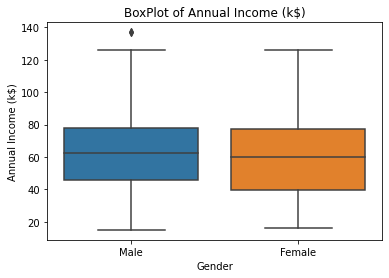

In [ ]:
#Boxplot
draw_box('Annual Income (k$)')

### Notes
- Mean and Median Annual Income for males is higher than of females
- Standard dev. is same for both genders.
- There's an outlier in the male group of about 140k$ Annual Income

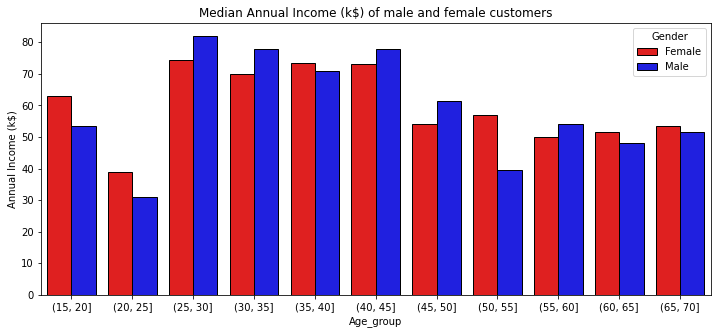

In [ ]:
draw_bars('Annual Income (k$)')

### Notes
- Annual Income is higher between age 25-45,mostly with men having a higher income.
- The biggest difference between women and men is visible in age groups 25-30 (male more rich) and 50-55 (female more rich)

### Spending Score Analysis

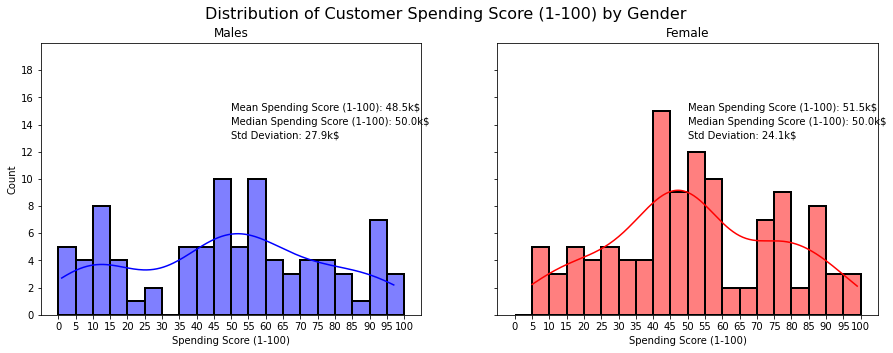

In [ ]:
draw_hist(feature='Spending Score (1-100)', bins_range= range(0,105,5),yticks=range(0,20,2),ylim=(0,20),x_cord=50,y_cord=15)

Most males have Spending Score (1-100) below the median Spending Score (1-100)
Most females have Spending Score (1-100) above the median Spending Score (1-100)


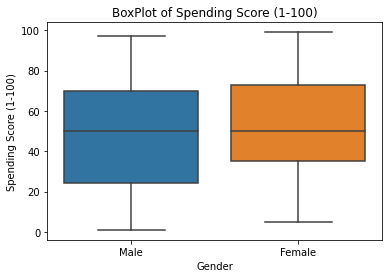

In [ ]:
draw_box('Spending Score (1-100)')

### Notes
- Females have a higher mean spending score than males.
- Most Females are above the median scoring score.
- Most Males are below the median scoring score.
- Females, despite of having a lesser annual income than males, spend more than males. Maybe, it's coz they go to the mall often.

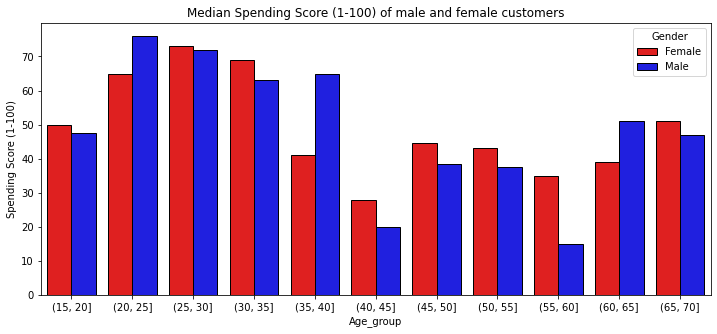

In [ ]:
draw_bars('Spending Score (1-100)')

### Notes
- The ages 20-40 is where people have a higher spending score. 
- Prevoisly, age 35-40 women had a higher Annual Income than men, but have a lower Spending Score than men.

# Renaming Features

🚀 <font color='#D9C4B1'>Exercise: </font> The income and spending score columns have pretty awkward names. Rename them as "AnnualIncome" and "SpendingScore", respectively.

In [ ]:
df = df.rename(columns={'Annual Income (k$)': 'AnnualIncome'})
df = df.rename(columns={'Spending Score (1-100)':'SpendingScore'})
df.columns

Index(['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'SpendingScore'], dtype='object')

🚀 <font color='#D9C4B1'>Exercise: </font> Visualize the `Age` and `SpendingScore` distinguished by `Gender`.

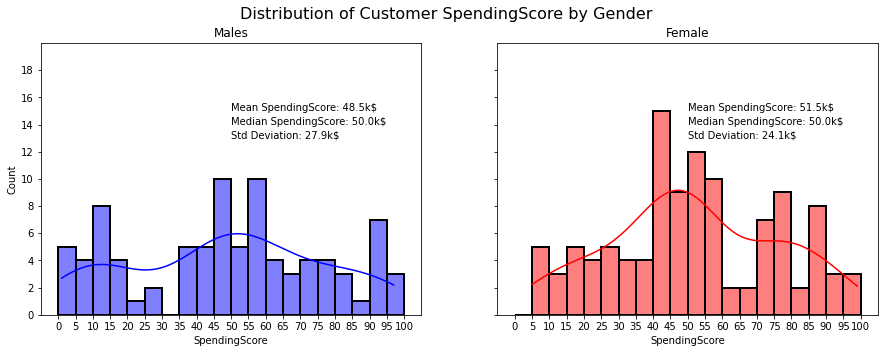

In [ ]:
draw_hist(feature='SpendingScore', bins_range= range(0,105,5),yticks=range(0,20,2),ylim=(0,20),x_cord=50,y_cord=15)

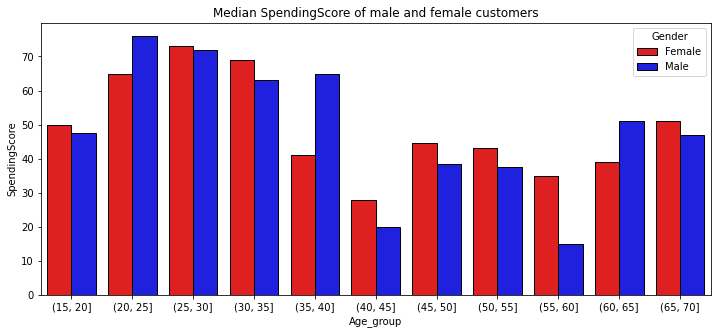

In [ ]:
draw_bars('SpendingScore')

Most males have SpendingScore below the median SpendingScore
Most females have SpendingScore above the median SpendingScore


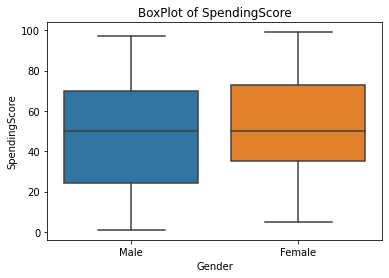

In [ ]:
draw_box('SpendingScore')

# Clustering

### <font color='#31394d'> Apply k-Means Clustering </font>

Let's attempt to identify clusters based on Age and SpendingScore. Using two variables will allow us to visualize the results, but feel free to re-run this with all the continuous variables. K-means clustering is not suitable for categorical variables.

In [ ]:
from sklearn.cluster import KMeans

🚀 <font color='#D9C4B1'>Exercise: </font> Have a look at the help for `KMeans`. What do the "init" and "n_init" arguments do?

In [ ]:
?KMeans

Init signature:
KMeans(
    n_clusters=8,
    *,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    verbose=0,
    random_state=None,
    copy_x=True,
    algorithm='auto',
)
Docstring:     
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization:

    'k-means++' : selects initial cluster centers for k-mean
    clustering in a smart way to speed up convergence. See section
    Notes in k_init for more details.

    'random': choose `n_clusters` observations (rows) at random from data
    for the initial centroids.

    If an array is passed, it should be of shape (n_clusters, n_features)
    and gives the initial centers.

    If a callable is passed, it should ta

### Notes
- Init -> tells the KMeans algo how to choose the initial points/centroids for the clusters. By default, k-means++ method is used.It helps the algo find a better solution faster.Alternatively, one can choose "random" to select random starting points or "ndarray" to  provide custom starting points.
- n_init -> tells the algo how many times to run the k-means algorithm with different starting points. The best solution has low inertia and is chosen as a final result.
 - Inertia is the distance between a point and the its nearest centroid
- By default, n_init =10, but can be changed. 

Let's perform k-Means clustering with k=4 (no particular reason, just as an example!)...

In [ ]:
km = KMeans(n_clusters=4) # K = 4 
km.fit(df[['Age','SpendingScore']])

KMeans(n_clusters=4)

🚀 <font color='#D9C4B1'>Exercise: </font> What attributes does the `km` object have?

In [ ]:
attr = dir(km)
print(attr)

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_algorithm', '_check_feature_names', '_check_mkl_vcomp', '_check_n_features', '_check_params', '_check_test_data', '_estimator_type', '_get_param_names', '_get_tags', '_init_centroids', '_more_tags', '_n_init', '_n_threads', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_tol', '_transform', '_validate_center_shape', '_validate_data', 'algorithm', 'cluster_centers_', 'copy_x', 'feature_names_in_', 'fit', 'fit_predict', 'fit_transform', 'get_params', 'inertia_', 'init', 'labels_', 'max_iter', 'n_clusters', 'n_features_in_', 'n_init', 'n_iter_', 'predict', 'random_state', 'score', 'set_params', 'tol', 'tran

Let's have a look at cluster centroids:

In [ ]:
pd.DataFrame(km.cluster_centers_, columns=['Age','SpendingScore'], index=['Cluster1', 'Cluster2', 'Cluster3', 'Cluster4'])

,Age,SpendingScore
Cluster1,30.175439,82.350877
Cluster2,55.708333,48.229167
Cluster3,43.291667,15.020833
Cluster4,27.617021,49.148936


Let's add a column with the predicted cluster label:

In [ ]:
km.labels_

array([3, 0, 2, 0, 3, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 3, 3, 2, 0, 3, 0,
       2, 0, 2, 0, 2, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 3,
       2, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3,
       1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3,
       3, 1, 1, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1,
       1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 0, 3, 0, 1, 0, 2, 0, 2, 0,
       3, 0, 2, 0, 2, 0, 2, 0, 2, 0, 3, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 3, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 3, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [ ]:
km.inertia_

28165.583566629342

In [ ]:
# +1 - shift the label values so that they start from 1 instead of 0. 
df['Cluster'] = km.labels_ + 1
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,1
2,3,Female,20,16,6,3
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4


Let's visualize our clusters. Note that we can only do this because this is a toy example with two features (so we can plot them in a 2D space). If we had more than three features, we would not be able to visualize the clusters, but we could still examine the cluster centroids to determine what the clusters represent.

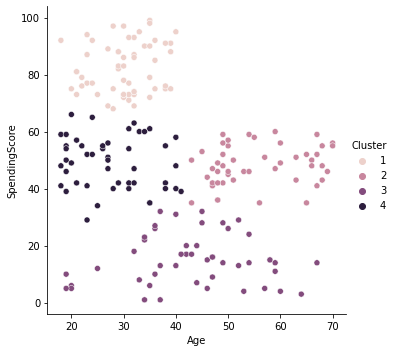

In [ ]:
sns.relplot(x="Age", y="SpendingScore", data=df, hue="Cluster")

### <font color='#31394d'> Finding the Best k</font>

The `sklearn` `KMeans` method calls the total within-cluster variation "inertia". This is stored as the `inertia_` attribute of the fitted object. Next, we will loop over different values of k, store the inertia and choose the best value of k using the "elbow" method. 

In [ ]:
import os

os.environ['OMP_NUM_THREADS'] = '1'
inertia = []
for k in range(1 , 21):
    estimator = KMeans(n_clusters=k)
    estimator.fit(df[['Age','SpendingScore']])
    inertia.append(estimator.inertia_)

c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [ ]:
inertia

[171535.5,
 75949.15601023017,
 45840.67661610868,
 28165.583566629342,
 23819.442236543742,
 19492.611301496087,
 15523.684014328752,
 13095.25718268583,
 11718.350839219258,
 10173.029659027621,
 9345.443810568086,
 8667.739952353573,
 7943.916808412177,
 7365.094665138782,
 6667.366508219448,
 6071.854341736695,
 5661.5170665935375,
 5302.93288613691,
 5093.9939939145825,
 4728.412953631336]

<AxesSubplot:>

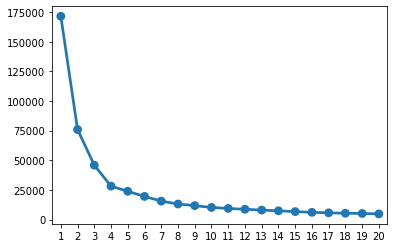

In [ ]:
sns.pointplot(x=np.arange(1,21), y=inertia)

🚀 <font color='#D9C4B1'>Exercise: </font> How many clusters would you select? (There is no single "right" answer.)

###
- 5 or 6, because the slope is not very steep from there